#### The MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. it stop training once we reach that level of accuracy.

Some notes:

######  It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
###### When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
###### If you add any additional variables, make sure you use the same names as the ones used in the class

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [33]:
# Using callbacks to stop the training when we reach accuracy to 99 %
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True        
callbacks = myCallback()

In [22]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

In [26]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)

])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [27]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2603 - accuracy: 0.9250
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1182 - accuracy: 0.9658
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0818 - accuracy: 0.9750
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0605 - accuracy: 0.9817
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0475 - accuracy: 0.9851
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0380 - accuracy: 0.9880
Epoch 7/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9910
Reached 96% accuracy so cancelling training!
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0292 - accuracy: 0.9910


In [29]:
print(model.evaluate(x_test,y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08046091422198806, 0.9764]


Model Prediction :  0


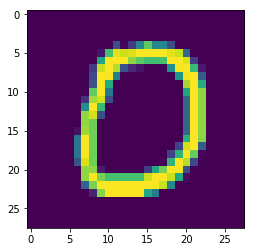

In [32]:
import numpy as np
label=[0,11,2,3,4,5,6,7,8,9]

#model.predict(label[np.argmax(np.expand_dims(x_test[0],0))])
plt.imshow(x_test[10])
print('Model Prediction : ',label[np.argmax(model.predict(np.expand_dims(x_test[10],0)))])